# P4DS Final Project: Student Depression Dataset

Nhóm 26:
Sinh viên thực hiện:
- Châu Văn Minh Khoa - 23122035
- Phan Ngọc Quân - 23122046


## I. Import thư viện

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## II. Thu thập dữ liệu

### Dữ liệu của bạn là về chủ đề gì?
- Người học hiện nay đối mặt đồng thời với nhiều áp lực học tập (khối lượng bài tập, kỳ vọng điểm số, cạnh tranh) và áp lực cuộc sống (tài chính, gia đình, sức khỏe, thời gian ngủ nghỉ). Những áp lực tích lũy này nếu không được nhận diện sớm dễ dẫn tới suy giảm sức khỏe tâm thần.
- Bộ dữ liệu này ghi nhận có cấu trúc các yếu tố đó để tạo ra một hệ đo lường định lượng cho nguy cơ trầm cảm: thang điểm áp lực học tập/công việc, sự hài lòng học tập/việc làm, thời lượng ngủ, chế độ ăn, stress tài chính, tiền sử gia đình, suy nghĩ tự tử,…
- Mục tiêu: cung cấp nền tảng cho việc dự báo trầm cảm (biến mục tiêu `Depression`) và từ đó đề xuất khuyến nghị cá nhân hóa—ví dụ cải thiện thói quen ngủ, quản lý thời gian học, tìm hỗ trợ tâm lý hoặc tài chính.
- Việc chuẩn hóa các chỉ số giúp nhà trường/nghiên cứu theo dõi xu hướng, phát hiện nhóm nguy cơ cao và đưa ra can thiệp phòng ngừa thay vì chỉ xử lý khi vấn đề đã nghiêm trọng.

### Mục đích lựa chọn dữ liệu này
- Nhóm chúng em chọn bộ dữ liệu này vì nhận thấy có nhiều feature trong tập data này, rất phù hợp để khám phá các yếu tố liên quan đến nguy cơ trầm cảm ở sinh viên: áp lực học tập, thời lượng ngủ, áp lực tài chính, thói quen ăn uống,... Qua đó, xác định những biến có ảnh hưởng mạnh để định hướng can thiệp sớm, cung cấp gợi ý cân bằng học tập/đời sống.
- Chuẩn bị cho các bước phân tích nâng cao và mô hình hóa (ví dụ: dự đoán `Depression`), nhằm hỗ trợ nhận diện rủi ro và đề xuất biện pháp hỗ trợ phù hợp trong môi trường giáo dục.

### Nguồn dữ liệu – Quyền sử dụng
- Nguồn: Kaggle – Student Depression Dataset (https://www.kaggle.com/datasets/hopesb/student-depression-dataset).
- License: Apache 2.0
- Mục đích sử dụng: học tập/nghiên cứu, tuân thủ điều khoản sử dụng của Kaggle; dữ liệu có tính nhạy cảm (sức khỏe tâm thần), cần tôn trọng quyền riêng tư.
- Lưu ý đạo đức: Bảo mật danh tính, tránh suy diễn cá nhân, sử dụng dữ liệu một cách có trách nhiệm; nếu chia sẻ kết quả, không công khai thông tin có thể định danh.

### Người ta thu thập dữ liệu như thế nào?
- Hình thức: Khảo sát tự báo cáo (self-reported) trên các khía cạnh: áp lực học tập/công việc, tài chính, thói quen ngủ/ăn, sự hài lòng học tập/việc làm, tiền sử gia đình về bệnh liên quan tâm thần, và câu hỏi nhạy cảm về suy nghĩ tự tử.
- Thang đo: Nhiều biến được mã hóa dạng thang điểm số/likert (ví dụ 1–5), một số biến là phân loại (ví dụ `Gender`, `City`, `Sleep Duration`, `Dietary Habits`, `Degree`).
- Đối tượng: Chủ yếu là sinh viên và có 1 số ngành nghề khác.

### Mô tả dữ liệu
- Mỗi dòng: Một người tham gia khảo sát với các đặc trưng liên quan học tập, lối sống, tâm lý và nhãn `Depression`.
- Các nhóm biến chính:
  - Định lượng (numeric): `Age`, `Academic Pressure`, `Work Pressure`, `CGPA`, `Study Satisfaction`, `Job Satisfaction`, `Work/Study Hours`, `Financial Stress`, `Family History of Mental Illness` (một số biến có thể lưu dạng số nhưng là thang điểm). 
  - Phân loại (categorical): `Gender`, `City`, `Profession`, `Sleep Duration`, `Dietary Habits`, `Degree`, `Have you ever had suicidal thoughts ?`…
- Mục tiêu phân tích: Hiểu phân bố, phát hiện bất thường, xem tương quan giữa các biến; về sau xây dựng mô hình dự đoán `Depression` để hỗ trợ nhận diện rủi ro.
- Nhạy cảm & riêng tư: Dữ liệu liên quan sức khỏe tâm thần cần thận trọng khi diễn giải và truyền thông kết quả.

> Tóm lại, đây là bộ dữ liệu có giá trị cho nghiên cứu trong tâm lý học, khoa học dữ liệu và giáo dục nhằm nhận diện các yếu tố góp phần vào trầm cảm ở sinh viên và thiết kế các chiến lược can thiệp sớm; đồng thời đòi hỏi tuân thủ chặt chẽ các chuẩn mực đạo đức và quyền riêng tư. Bây giờ để hiểu rõ hơn về dataset, mời thầy và các bạn cùng bước vào phần "Khám phá dữ liệu".

## III. Khám phá dữ liệu


### Đọc dữ liệu

In [33]:
# Đọc dữ liệu
data_path = "data/Student Depression Dataset.csv"
df = pd.read_csv(data_path)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


### Số dòng và cột

In [34]:
rows, cols = df.shape
print(f"Số dòng: {rows}, Số cột: {cols}")

Số dòng: 27901, Số cột: 18


- Như vậy dữ liệu có 27901 dòng và 18 cột.

### Các dòng dữ liệu

#### Mỗi dòng có ý nghĩa gì? Có dòng nào có ý nghĩa khác với các dòng còn lại không?

In [35]:
df.sample(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
12058,60870,Female,21.0,Vasai-Virar,Student,1.0,0.0,6.36,2.0,0.0,7-8 hours,Unhealthy,M.Tech,Yes,10.0,4.0,No,0
8469,42683,Male,18.0,Visakhapatnam,Student,3.0,0.0,6.03,4.0,0.0,More than 8 hours,Healthy,Class 12,No,8.0,2.0,Yes,0
26517,133718,Female,28.0,Nagpur,Student,5.0,0.0,8.04,1.0,0.0,7-8 hours,Unhealthy,M.Pharm,Yes,7.0,1.0,No,1
8091,40768,Female,29.0,Vadodara,Student,1.0,0.0,6.02,2.0,0.0,More than 8 hours,Moderate,B.Tech,No,4.0,4.0,No,0
10248,51840,Male,30.0,Ludhiana,Student,5.0,0.0,8.58,2.0,0.0,Less than 5 hours,Healthy,MA,Yes,8.0,5.0,Yes,1
18806,95172,Male,24.0,Patna,Student,1.0,0.0,8.21,5.0,0.0,Less than 5 hours,Healthy,MBBS,Yes,10.0,3.0,Yes,1
17163,86926,Male,19.0,Rajkot,Student,4.0,0.0,8.90,4.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,9.0,4.0,No,1
13305,67512,Male,30.0,Jaipur,Student,5.0,0.0,9.72,1.0,0.0,7-8 hours,Healthy,Class 12,No,4.0,2.0,Yes,0
18306,92697,Male,33.0,Indore,Student,2.0,0.0,5.74,3.0,0.0,7-8 hours,Unhealthy,B.Com,Yes,12.0,1.0,No,0
3511,17615,Male,30.0,Ludhiana,Student,4.0,0.0,8.62,3.0,0.0,5-6 hours,Moderate,BA,Yes,12.0,2.0,Yes,1


- Mỗi dòng tương ứng với thông tin của mỗi sinh viên tham gia khảo sát. Nhìn chung không có dòng nào khác biệt cả.

#### Kiểm tra trùng lặp

In [36]:
# Kiểm tra trùng lặp hoàn toàn
duplicate_count = df.duplicated().sum()
print(f"Số dòng trùng lặp hoàn toàn: {duplicate_count}")
df[df.duplicated()]

Số dòng trùng lặp hoàn toàn: 0


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


- Không có dòng nào bị trùng hoàn toàn cả.

### Các cột dữ liệu

#### Ý nghĩa các cột

In [37]:
list(df.columns.values)

['id',
 'Gender',
 'Age',
 'City',
 'Profession',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Work/Study Hours',
 'Financial Stress',
 'Family History of Mental Illness',
 'Depression']

| Cột | Ý nghĩa |
|---|---|
| id | Định danh duy nhất cho mỗi bản ghi người học trong bộ dữ liệu. |
| Gender | Giới tính của người học (ví dụ: Nam, Nữ, Khác); hỗ trợ phân tích xu hướng theo giới. |
| Age | Tuổi của người học (năm). |
| City | Thành phố/khu vực cư trú; cung cấp bối cảnh địa lý cho phân tích. |
| Profession | Ngành học/nghề nghiệp hiện tại; có thể phản ánh các yếu tố stress học tập/việc làm. |
| Academic Pressure | Mức độ áp lực trong môi trường học tập (thi cử, bài tập, kỳ vọng điểm số…). |
| Work Pressure | Mức độ áp lực liên quan đến công việc (đối với người vừa học vừa làm). |
| CGPA | Điểm trung bình tích lũy (Cumulative GPA) thể hiện hiệu quả học tập tổng quát. |
| Study Satisfaction | Mức độ hài lòng với việc học; có thể liên hệ với sức khỏe tinh thần. |
| Job Satisfaction | Mức độ hài lòng với công việc/môi trường làm việc (nếu áp dụng). |
| Sleep Duration | Thời lượng ngủ trung bình mỗi ngày; yếu tố quan trọng đối với sức khỏe tinh thần. |
| Dietary Habits | Thói quen ăn uống/dinh dưỡng; có thể ảnh hưởng đến sức khỏe tổng thể và tâm trạng. |
| Degree | Bậc học/chương trình đang theo học. |
| Have you ever had suicidal thoughts ? | Đã từng có ý nghĩ tự tử hay chưa (Có/Không). Đây là biến nhạy cảm cần thận trọng. |
| Work/Study Hours | Số giờ học/làm việc trung bình mỗi ngày; có thể ảnh hưởng mức độ căng thẳng. |
| Financial Stress | Mức độ căng thẳng do tài chính; yếu tố có thể tác động đến sức khỏe tinh thần. |
| Family History of Mental Illness | Tiền sử gia đình có bệnh liên quan sức khỏe tâm thần (Có/Không); là yếu tố nguy cơ quan trọng. |
| Depression | Biến mục tiêu nhị phân cho biết người học có đang trải nghiệm trầm cảm hay không (0/1). |

#### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [38]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [39]:
# Chuẩn hóa giới tính về nhị phân 0/1 (chỉnh trực tiếp cột Gender)
# Male -> 1, Female -> 0
if 'Gender' in df.columns:
    df['Gender'] = (
        df['Gender']
        .astype(str)
        .str.strip()
        .str.lower()
        .map({'male': 1, 'female': 0})
    )
    print('Đã chuẩn hóa trực tiếp cột Gender (Male=1, Female=0).')
else:
    print('Không tìm thấy cột Gender trong DataFrame.')

Đã chuẩn hóa trực tiếp cột Gender (Male=1, Female=0).


In [40]:
# Chuẩn hóa trực tiếp các cột Yes/No về nhị phân 0/1 (No/Yes -> 0/1)
cols_yes_no = [
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness',
]
for c in cols_yes_no:
    if c in df.columns:
        # Chỉ chuẩn hóa nếu là kiểu object/chuỗi (tránh ghi đè thang điểm số 1–5, v.v.)
        if df[c].dtype == 'object':
            df[c] = (
                df[c]
                .astype(str)
                .str.strip()
                .str.lower()
                .map({'yes': 1, 'no': 0})
            )
            print(f"Đã chuẩn hóa trực tiếp cột {c} (Yes=1, No=0)")
        else:
            print(f"Bỏ qua cột {c} vì không phải kiểu Yes/No dạng object (dtype={df[c].dtype})")
    else:
        print(f"Không tìm thấy cột {c} trong DataFrame.")

Đã chuẩn hóa trực tiếp cột Have you ever had suicidal thoughts ? (Yes=1, No=0)
Đã chuẩn hóa trực tiếp cột Family History of Mental Illness (Yes=1, No=0)


In [41]:
# Xóa cột id
if 'id' in df.columns:
    df = df.drop(columns=['id'])
    print("Đã xóa cột id.")


Đã xóa cột id.


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

- Như vậy các cột dữ liệu đã ổn để tiếp tục.

#### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào

Vì trong các cột có kiểu dữ liệu dạng số, có vài cột có ít hơn 5 giá trị khác nhau nên ta sẽ xét chúng vào nhóm kiểu dữ liệu dạng phân loại

In [43]:
unique_counts = df.nunique() < 5
categorical  = unique_counts[unique_counts == True].index.tolist()
categorical.extend(df.select_dtypes(exclude=["number","bool_"]).columns.tolist())
categorical

['Gender',
 'Work Pressure',
 'Dietary Habits',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness',
 'Depression',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree']

Numeric: các cột còn lại không thuộc categorical và có kiểu số

In [44]:
numeric = [col for col in df.columns if col not in categorical and pd.api.types.is_numeric_dtype(df[col])]
numeric

['Age',
 'Academic Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress']

Ở phần này, với các cột có kiểu dữ liệu số để hiểu thêm về dữ liệu, ta sẽ tính:
- Số các giá trị thiếu
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị median
- Giá trị max

In [45]:
num_summary_rows = []
for col in numeric:
    s = df[col]
    missing = s.isna().sum()
    missing_pct = round(missing/len(s)*100,2)
    mean_val = s.mean()
    min_val = s.min()
    q1 = s.quantile(0.25)
    median_val = s.median()
    q3 = s.quantile(0.75)
    max_val = s.max()
    num_summary_rows.append({
        'column': col,
        'num_missing': missing,
        'missing_%': missing_pct,
        'mean': mean_val,
        'min': min_val,
        'q1': q1,
        'median': median_val,
        'q3': q3,
        'max': max_val
    })
num_summary_df = pd.DataFrame(num_summary_rows)
print('\n=== Thống kê numeric ===')
num_summary_df


=== Thống kê numeric ===


,column,num_missing,missing_%,mean,min,q1,median,q3,max
0,Age,0,0.00,25.822300,18.0,21.00,25.00,30.00,59.0
1,Academic Pressure,0,0.00,3.141214,0.0,2.00,3.00,4.00,5.0
2,CGPA,0,0.00,7.656104,0.0,6.29,7.77,8.92,10.0
3,Study Satisfaction,0,0.00,2.943837,0.0,2.00,3.00,4.00,5.0
4,Job Satisfaction,0,0.00,0.000681,0.0,0.00,0.00,0.00,4.0
5,Work/Study Hours,0,0.00,7.156984,0.0,4.00,8.00,10.00,12.0
6,Financial Stress,3,0.01,3.139867,1.0,2.00,3.00,4.00,5.0


#### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu không phải số và các cột có dạng số nhưng có ít hơn 10 giá trị khác nhau, ta sẽ tính:

- Số các giá trị thiếu và tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu) 
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): bạn dùng dictionary để lưu, key là giá trị, value là tỉ lệ %

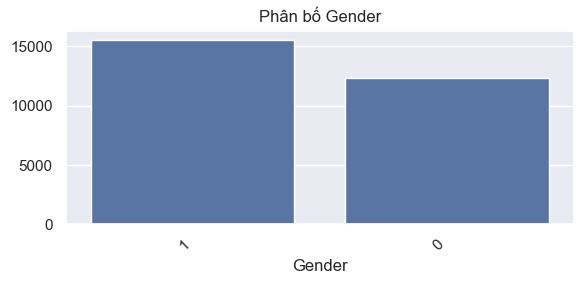

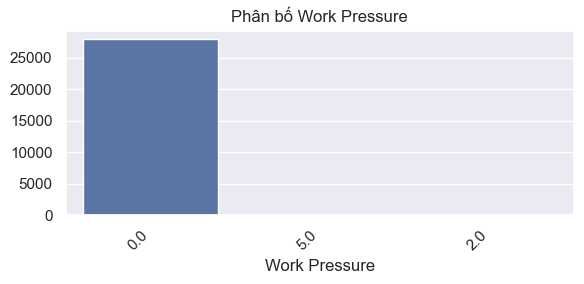

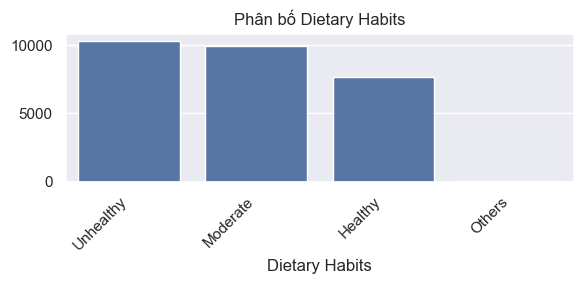

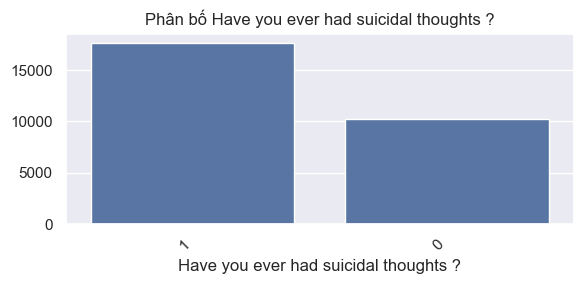

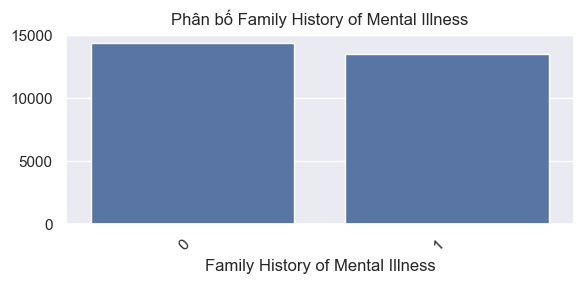

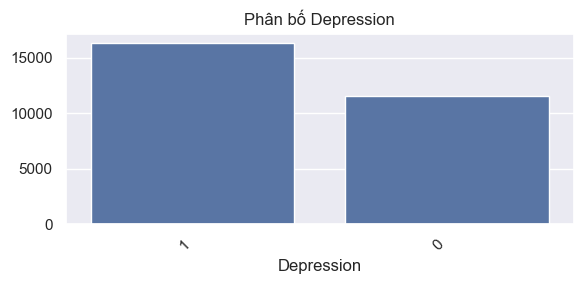

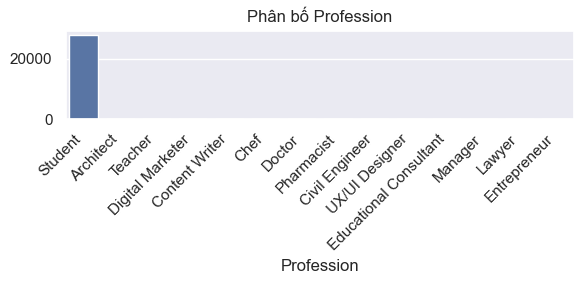

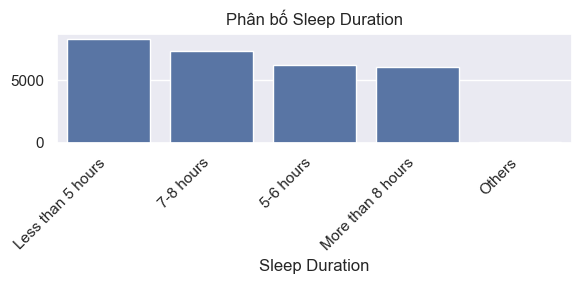

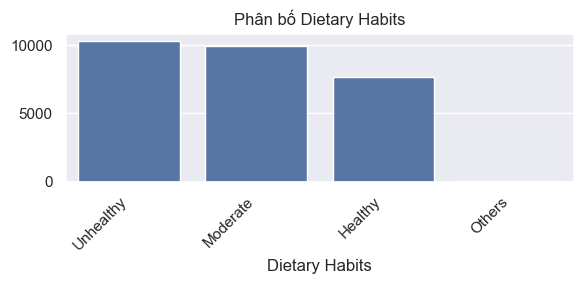

In [46]:
# Thống kê nhóm biến categorical
cat_summary_rows = []
for col in categorical:
    s = df[col]
    missing = s.isna().sum()
    missing_pct = round(missing/len(s)*100,2)
    unique_vals = s.nunique(dropna=True)
 
    value_pct = (s.value_counts(normalize=True, dropna=True)*100).round(2).to_dict()
    cat_summary_rows.append({
        'column': col,
        'num_missing': missing,
        'missing_%': missing_pct,
        'unique_values': unique_vals,
        'value_percentages': value_pct
    })
cat_summary_df = pd.DataFrame(cat_summary_rows)
cat_summary_df

# === Trực quan nhanh một số biến categorical (giới hạn số giá trị <= 15) ===
import matplotlib.pyplot as plt
import seaborn as sns
for col in categorical:
    vc = df[col].value_counts(dropna=False)
    if vc.shape[0] <= 15:
        plt.figure(figsize=(6,3))
        sns.barplot(x=vc.index.astype(str), y=vc.values)
        plt.title(f'Phân bố {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

Nhận xét gì đó abc xyz


### Phát hiện outlier (IQR)

In [47]:
# IQR outlier detection
outlier_rows = []
for col in numeric:
    s = df[col].dropna()
    if s.nunique() < 5:
        continue
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (s < lower) | (s > upper)
    outlier_rows.append({"column": col, "outliers": mask.sum(), "percent": round(mask.sum()/len(s)*100,2)})
import pandas as pd
pd.DataFrame(outlier_rows)

,column,outliers,percent
0,Age,12,0.04
1,Academic Pressure,0,0.00
2,CGPA,9,0.03
3,Study Satisfaction,0,0.00
4,Job Satisfaction,8,0.03
5,Work/Study Hours,0,0.00
6,Financial Stress,0,0.00


### Sơ lược mối tương quan giữa các cột

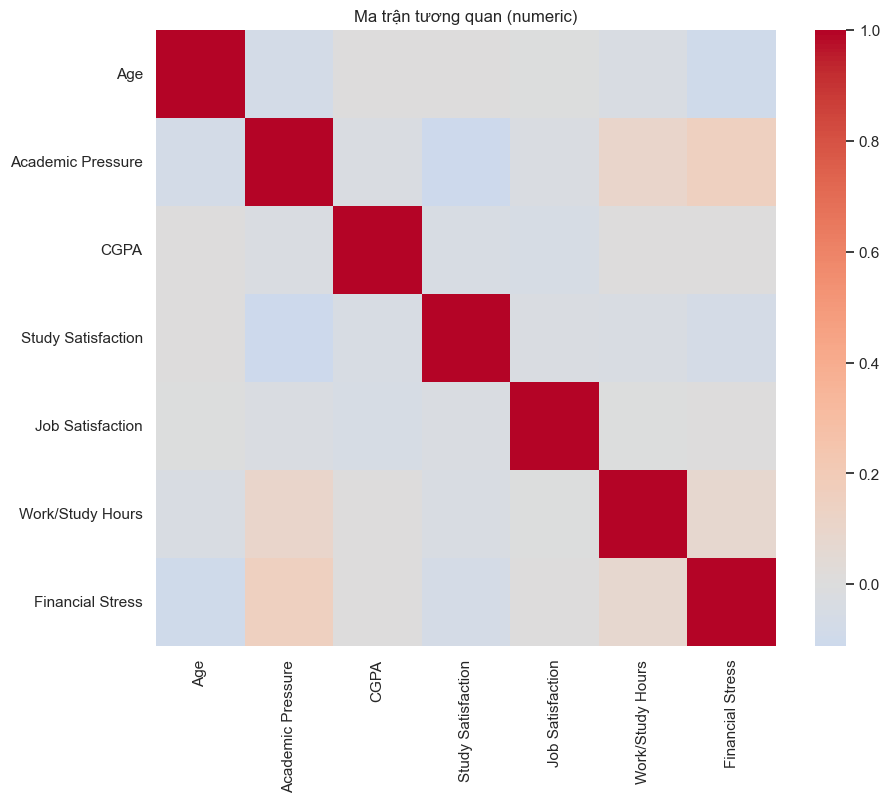

In [48]:
# Heatmap tương quan
corr = df[numeric].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Ma trận tương quan (numeric)")
plt.show()

## IV. Đặt câu hỏi và thực hiện phân tích dữ liệu
(Sẽ bổ sung sau: câu hỏi nghiên cứu, phân tích sâu, trực quan nâng cao.)

## V. Tổng kết
(Hiện tại: Đã khám phá cấu trúc, phân bố, outlier, tương quan. Hướng phát triển: xử lý mất cân bằng lớp, thử mô hình ML, phân tích tầm ảnh hưởng.)

## VI. Tài liệu tham khảo
1. Kaggle Student Depression Dataset.
2. Phương pháp thống kê mô tả & phát hiện outlier (IQR).
3. Tài liệu về tiền xử lý dữ liệu và mô hình học máy (sẽ bổ sung).